# 第2章 分散と標準偏差

---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_02/Colaboratory/Lesson_02.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_02/Colaboratory/Lesson_02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

上海飯店と四川飯店の麻婆豆腐の豆腐サイズ（重さ）について度数分布図を作成して比較します。

---


## 事前準備



### matplotlibの日本語化ライブラリをインストール



In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=dc81528eb9b86cb6f007f5603a469bef5b6bec21c4ae1e8e2f87b5c16f55f2a4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


### 上海飯店と四川飯店のデータをダウンロード

In [2]:
## 上海飯店のデータをGithubよりダウンロード
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/shanghai_tofu.csv -O shanghai_tofu.csv

## 四川飯店のデータをGithubよりダウンロード
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/shisen_tofu.csv -O shisen_tofu.csv

--2024-10-20 08:53:15--  https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/shanghai_tofu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284 [text/plain]
Saving to: ‘shanghai_tofu.csv’

shanghai_tofu.csv   100%[===================>]     284  --.-KB/s    in 0s      

2024-10-20 08:53:15 (16.5 MB/s) - ‘shanghai_tofu.csv’ saved [284/284]

--2024-10-20 08:53:15--  https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/shisen_tofu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

### データ分析，グラフ作成ライブラリをインポート
pandas，matplotlibをインポートします。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib


pandasにCSVデータを読み込みます。

In [4]:
shanghai_tofu = pd.read_csv("./shanghai_tofu.csv")
shisen_tofu = pd.read_csv("./shisen_tofu.csv")

読み込んだデータを表示

In [5]:
with pd.option_context('display.max_rows',6):
    print(shanghai_tofu)

    番号    重さ
0    1  16.9
1    2  15.7
2    3  13.1
..  ..   ...
29  30  19.2
30  31  10.1
31  32  14.5

[32 rows x 2 columns]


## 平均値・分散標準・偏差

### 平均値を求める
pandasの機能を使わずに，求めてみる。標本の数を$n$，平均値を$\mu_{x}$とすると，以下の式で表せる。
$$
\mu_{x}
= \frac{1}{n}(x_1 + x_2 + x_3 + \cdot \cdot \cdot + x_n)
= \frac{1}{n}\sum_{i=1}^{n} x_i
$$

In [6]:
# 上海飯店の平均値
sum_weight = 0
n = len(shanghai_tofu['重さ'])
for weight in shanghai_tofu['重さ']:
    sum_weight += weight
mean = sum_weight / n
print('上海飯店の平均値：', mean)

上海飯店の平均値： 14.359374999999998


同様に四川飯店の平均値を求める

In [7]:
# 四川飯店の平均値
sum_weight = 0
n = len(shisen_tofu['重さ'])
for weight in shisen_tofu['重さ']:
    sum_weight += weight
mean = sum_weight / n
print('四川飯店の平均値：', mean)

四川飯店の平均値： 15.864705882352943


|  | 平均値 |
| --- | --- |
| 上海飯店 | 14.36 |
 |四川飯店 | 15.86 |


### 分散・標準偏差を求める
pandasの機能を使わずに，分散求めてみる。分散を$s^2$，標本の数を$n$，平均値を$\mu_{x}$とすると，以下の式で表せる。
$$
s^2
 = \frac{1}{n}\{(x_1 - \mu_{x})^2 + (x_2 - \mu_{x})^2 + (x_3 - \mu_{x})^2 + \cdot \cdot \cdot + (x_n - \mu_{x})^2\}
$$
$$
s^2
 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \mu_{x})^2
$$

また標準偏差$s$は，

$$ s = \sqrt{s^2}$$

In [8]:
import math
# 上海飯店の分散と標準偏差
n = len(shanghai_tofu['重さ'])
mean = sum(shanghai_tofu['重さ']) / n
print(mean)
sum_div = 0
for weight in shanghai_tofu['重さ']:
    sum_div = sum_div + (weight - mean) * (weight - mean)
dispersion = sum_div / n
print('上海飯店の分散：', dispersion)
print('上海飯店の標準偏差：', math.sqrt(dispersion))

14.359374999999998
上海飯店の分散： 8.986787109375001
上海飯店の標準偏差： 2.997797042725708


## 度数分布図の作成

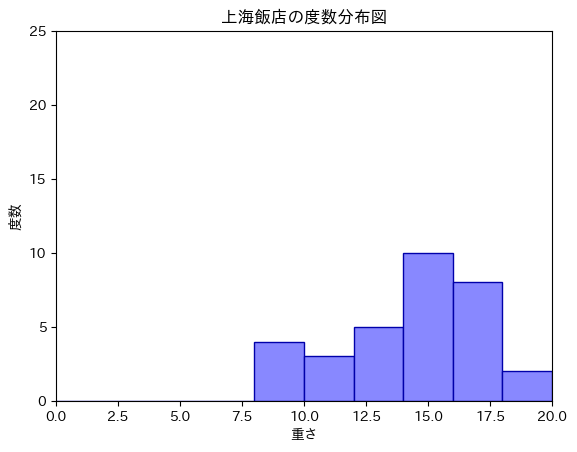

In [9]:
plt.hist(shanghai_tofu['重さ'], bins=range(0, 21, 2), color='#88F', ec='#00A')
plt.title('上海飯店の度数分布図')
plt.xlim([0, 20])
plt.ylim([0, 25])
plt.xlabel('重さ')
plt.ylabel('度数')
plt.show()

同様に，四川飯店の度数分布図を描きます

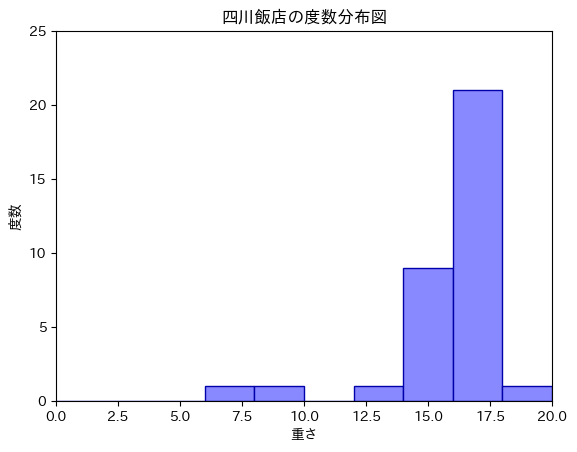

In [10]:
shisen_tofu = pd.read_csv("./shisen_tofu.csv")

plt.hist(shisen_tofu['重さ'], bins=range(0, 21, 2), color='#88F', ec='#00A')
plt.title('四川飯店の度数分布図')
plt.xlim([0, 20])
plt.ylim([0, 25])
plt.xlabel('重さ')
plt.ylabel('度数')
plt.show()

2つのヒストグラムを1枚で

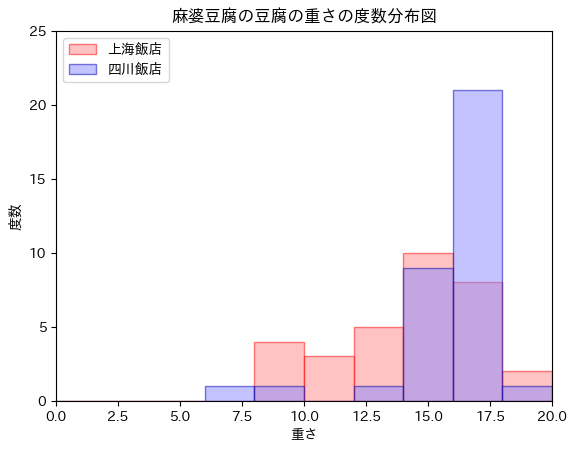

In [11]:
plt.hist(shanghai_tofu['重さ'],label='上海飯店', bins=range(0, 21, 2), color='#f88', ec='#F00',alpha=0.5)
plt.hist(shisen_tofu['重さ'], label='四川飯店', bins=range(0, 21, 2), color='#88F', ec='#00A',alpha=0.5)
plt.title('麻婆豆腐の豆腐の重さの度数分布図')
plt.xlim([0, 20])
plt.ylim([0, 25])
plt.xlabel('重さ')
plt.ylabel('度数')
plt.legend(loc='upper left')
plt.show()

## ※

pandasで取り込んだデータにについて，データ数，平均値，分散，標準偏差を出力するには以下のようなメソッドを使います。

In [12]:
# データ数
print('データ数', shanghai_tofu['重さ'].count())

# 平均値
print('平均値', shanghai_tofu['重さ'].mean())

# 分散
print('分散', shanghai_tofu['重さ'].var())

# 標準偏差
print('標準偏差', shanghai_tofu['重さ'].std(ddof=0))   # ddof=0 ：母集団標準偏差，1：標本標準偏差


データ数 32
平均値 14.359375
分散 9.276683467741936
標準偏差 2.997797042725708


※統計値をまとめて表示させたい場合は`decribe()`メソッドを使います。

In [13]:
print(shanghai_tofu['重さ'].describe())

count    32.000000
mean     14.359375
std       3.045765
min       9.000000
25%      12.575000
50%      14.850000
75%      16.950000
max      19.900000
Name: 重さ, dtype: float64


## 章末問題

In [14]:
## 成績データをGithubよりダウンロード
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/exam_score.csv -O exam_score.csv

exam_score = pd.read_csv("./exam_score.csv")






--2024-10-20 08:53:19--  https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_02/Sample_Data/exam_score.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273 [text/plain]
Saving to: ‘exam_score.csv’

exam_score.csv      100%[===================>]     273  --.-KB/s    in 0s      

2024-10-20 08:53:19 (4.53 MB/s) - ‘exam_score.csv’ saved [273/273]



### 各科目の平均点・分散・標準偏差

国語，数学，理科，社会の平均点，分散，標準偏差を求めます。

In [15]:
for key in exam_score.columns:
    if key != '学生番号':
        print(key, end='')
        print(f'  平均点：{exam_score[key].mean():.01f}',end='')
        print(f'  分散：{exam_score[key].var():.02f}',end='')
        print(f'  標準偏差：{exam_score[key].std(ddof=0):.02f}')


国語  平均点：64.1  分散：662.84  標準偏差：24.87
数学  平均点：55.4  分散：793.54  標準偏差：27.21
理科  平均点：56.5  分散：662.12  標準偏差：24.86
社会  平均点：64.6  分散：550.40  標準偏差：22.67


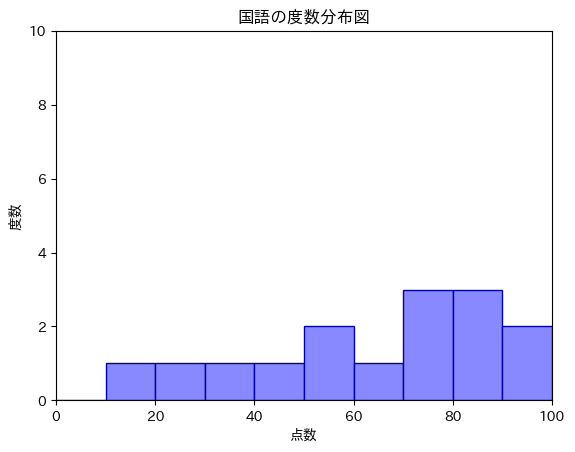

In [16]:
## 国語の度数分布図
plt.hist(exam_score['国語'], bins=range(0, 101, 10), color='#88F', ec='#00A')
plt.title('国語の度数分布図')
plt.xlim([0, 100])
plt.ylim([0, 10])
plt.xlabel('点数')
plt.ylabel('度数')
plt.show()

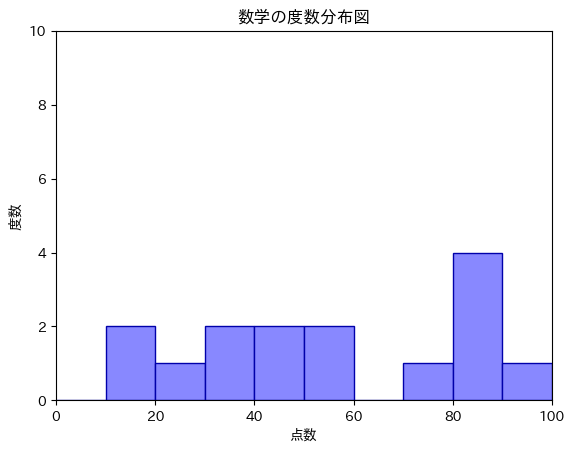

In [17]:
## 国語の度数分布図
plt.hist(exam_score['数学'], bins=range(0, 101, 10), color='#88F', ec='#00A')
plt.title('数学の度数分布図')
plt.xlim([0, 100])
plt.ylim([0, 10])
plt.xlabel('点数')
plt.ylabel('度数')
plt.show()